In [1]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.api import add_constant

from sklearn.svm import SVC 

# 모델 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


# grhpviz
from sklearn.tree import export_graphviz
import graphviz

# 로지스틱 회귀
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score

# 의사결정나무
from sklearn.tree import DecisionTreeClassifier


# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

# 그레디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

# 주피터 노트북 사용시 그래프 자동 출력 옵션
%matplotlib inline
matplotlib.rc('font', family = "NanumGothic")
plt.rc('font', family = "NanumGothic")
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df_raw = pd.read_csv("Data/SCALE불량.csv", encoding="cp949")

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THK             720 non-null    float64
 6   PT_WDTH            720 non-null    int64  
 7   PT_LTH             720 non-null    int64  
 8   PT_WGT             720 non-null    int64  
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    int64  
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

## 1. 데이터 분석, 전처리
- 결측치 확인
- 필요없는 데이터 분리 및 목표변수/설명변수 분리
- 이상치 제거
- 변수 커스터마이징

### 결측치 확인


In [4]:
df_raw.isnull().sum()

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

### 날짜 데이트, 철판번호 제거

In [5]:
df_raw.drop(["PLATE_NO", "ROLLING_DATE"], axis=1, inplace=True)
df_raw.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1133,934,적용,8,2조
1,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1135,937,적용,8,2조
2,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1121,889,적용,8,3조
3,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1127,885,적용,8,3조
4,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1128,873,적용,8,1조


### 변수 커스터 마이징
- "STEEL_KIND"의 경우 T변수와 C변수로 나눌 수 있을 것으로 보여진다.

In [103]:
df_raw["STEEL_KIND"].unique()

array(['T', 'C'], dtype=object)

In [7]:
df_raw["STEEL_KIND"] = df_raw["STEEL_KIND"].str[:1]

In [8]:
df_raw.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,AB/EH32-TM,T,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1133,934,적용,8,2조
1,양품,AB/EH32-TM,T,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1135,937,적용,8,2조
2,양품,NV-E36-TM,T,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1121,889,적용,8,3조
3,양품,NV-E36-TM,T,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1127,885,적용,8,3조
4,양품,BV-EH36-TM,T,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1128,873,적용,8,1조


### 이상치 제거
- 하단 탐색적 분석 진행도중 ROLLING_TEMP_T5의 이상치 확인
- 0 데이터가 나오는 것으로 보임으로 해당 데이터 삭제를 함

<AxesSubplot:>

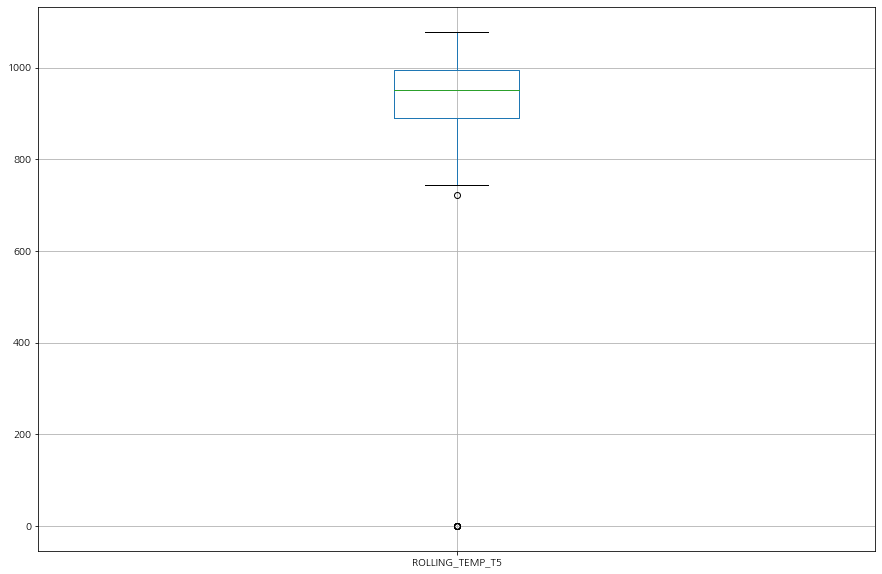

In [9]:
df_raw[["ROLLING_TEMP_T5"]].boxplot(figsize = (15, 10))

In [10]:
df_raw["ROLLING_TEMP_T5"].unique
df_raw[df_raw["ROLLING_TEMP_T5"] == 0]

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
41,양품,GL-E36-TM,T,55.51,3765,11398,37400,3호기,2,1132,95,1128,80,341,1128,0,적용,6,1조
184,양품,JS-SM490YB,C,16.09,2221,43596,61150,3호기,1,1169,64,1164,61,308,1164,0,적용,10,3조
185,양품,JS-SM490YB,C,16.09,2221,43596,61150,3호기,2,1163,57,1166,67,303,1166,0,적용,10,4조
494,양품,PILAC-BT33,T,80.82,2085,12919,17090,2호기,1,1133,89,1122,59,378,1122,0,적용,6,2조
495,양품,PILAC-BT33,T,80.82,2085,13176,17430,1호기,2,1130,92,1124,61,362,1124,0,적용,6,3조
496,양품,NV-D32-TM,T,40.35,2497,23592,37320,3호기,1,1119,109,1117,76,383,1117,0,적용,6,3조


In [11]:
drop_idx = df_raw[df_raw["ROLLING_TEMP_T5"] == 0].index

In [12]:
drop_idx

Int64Index([41, 184, 185, 494, 495, 496], dtype='int64')

In [13]:
df_raw.drop(drop_idx, inplace=True)

In [14]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 719
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              714 non-null    object 
 1   SPEC               714 non-null    object 
 2   STEEL_KIND         714 non-null    object 
 3   PT_THK             714 non-null    float64
 4   PT_WDTH            714 non-null    int64  
 5   PT_LTH             714 non-null    int64  
 6   PT_WGT             714 non-null    int64  
 7   FUR_NO             714 non-null    object 
 8   FUR_NO_ROW         714 non-null    int64  
 9   FUR_HZ_TEMP        714 non-null    int64  
 10  FUR_HZ_TIME        714 non-null    int64  
 11  FUR_SZ_TEMP        714 non-null    int64  
 12  FUR_SZ_TIME        714 non-null    int64  
 13  FUR_TIME           714 non-null    int64  
 14  FUR_EXTEMP         714 non-null    int64  
 15  ROLLING_TEMP_T5    714 non-null    int64  
 16  HSB                714 non

- 이상치를 가지고 있는 6개의 데이터 삭제

### 히스토그램 - 양품/불량 기준(연속형 데이터)

In [15]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.title(var)
    plt.legend()

### 빈도분석, 카이제곱 검정 (범주형데이터)

In [16]:
def fun_print_crosstab(data, var):
    return pd.crosstab(data["SCALE"], data[var], margins=True)

### plate 관련

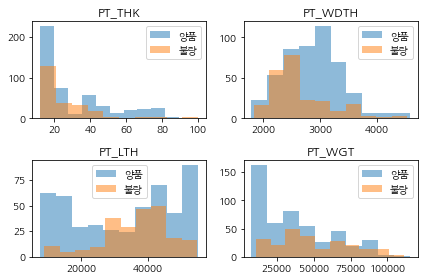

In [17]:
plt.subplot(2, 2, 1)
fun_plot_hist(df_raw, "PT_THK")
plt.subplot(2, 2, 2)
fun_plot_hist(df_raw, "PT_WDTH")
plt.subplot(2, 2, 3)
fun_plot_hist(df_raw, "PT_LTH")
plt.subplot(2, 2, 4)
fun_plot_hist(df_raw, "PT_WGT")

plt.tight_layout()

#### plate 두께

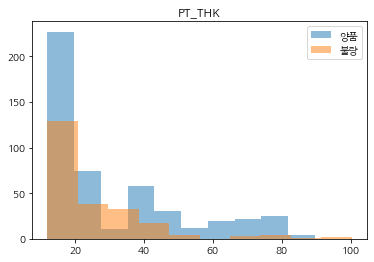

In [18]:
fun_plot_hist(df_raw, "PT_THK")

#### plate 폭

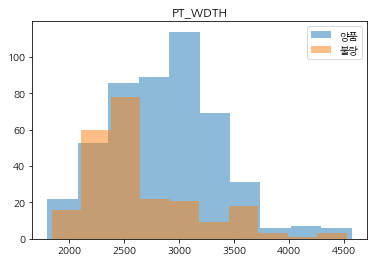

In [19]:
fun_plot_hist(df_raw, "PT_WDTH")

#### plate 길이

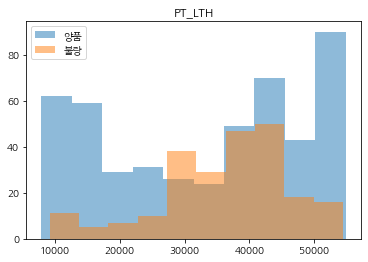

In [20]:
fun_plot_hist(df_raw, "PT_LTH")

#### plate 중량

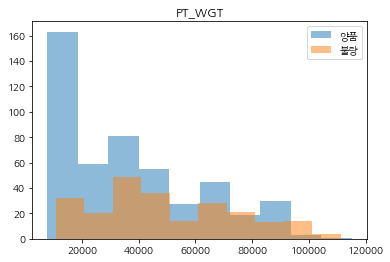

In [21]:
fun_plot_hist(df_raw, "PT_WGT")

### 가열로 관련

#### 가열로 호기

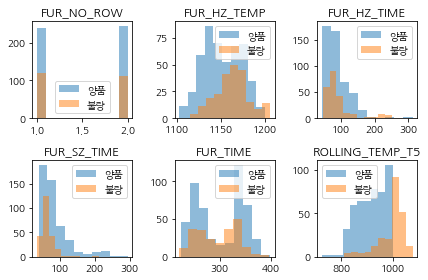

In [22]:
plt.subplot(2, 3, 1)
fun_plot_hist(df_raw, "FUR_NO_ROW")
plt.subplot(2, 3, 2)
fun_plot_hist(df_raw, "FUR_HZ_TEMP")
plt.subplot(2, 3, 3)
fun_plot_hist(df_raw, "FUR_HZ_TIME")
plt.subplot(2, 3, 4)
fun_plot_hist(df_raw, "FUR_SZ_TIME")
plt.subplot(2, 3, 5)
fun_plot_hist(df_raw, "FUR_TIME")
plt.subplot(2, 3, 6)
fun_plot_hist(df_raw, "ROLLING_TEMP_T5")

plt.tight_layout()

#### 가열로 작업순번(범주형)

In [23]:
fun_print_crosstab(df_raw, "FUR_NO_ROW")

FUR_NO_ROW,1,2,All
SCALE,,,
불량,120,111,231
양품,239,244,483
All,359,355,714


#### 가열로 가열대 온도

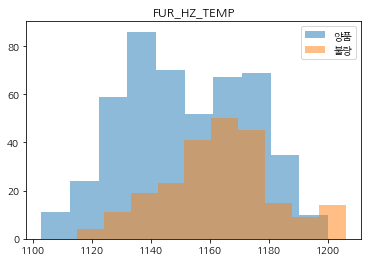

In [24]:
fun_plot_hist(df_raw, "FUR_HZ_TEMP")

#### 가열로 가열대 시간

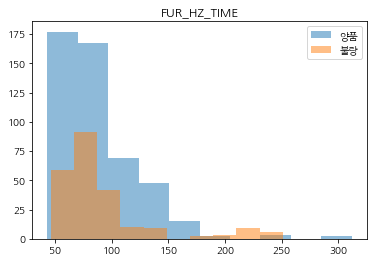

In [25]:
fun_plot_hist(df_raw, "FUR_HZ_TIME")

#### 가열로 균열대 온도

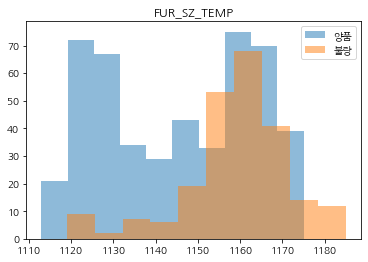

In [26]:
fun_plot_hist(df_raw, "FUR_SZ_TEMP")

#### 가열로 균열대 시간

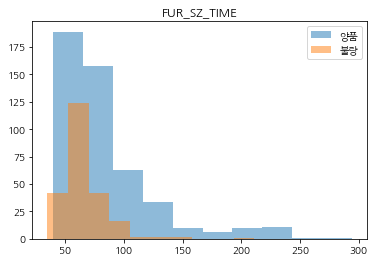

In [27]:
fun_plot_hist(df_raw, "FUR_SZ_TIME")

#### 가열로 시간

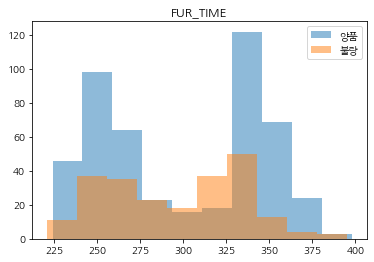

In [28]:
fun_plot_hist(df_raw, "FUR_TIME")

### 가열로 추출 온도 vs 가열로 균열대 온도

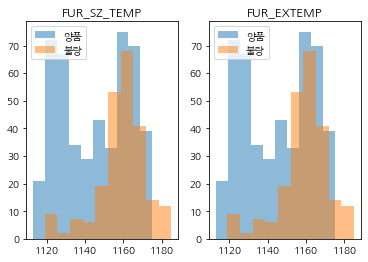

In [29]:
plt.subplot(1, 2, 1)
fun_plot_hist(df_raw, "FUR_SZ_TEMP")
plt.subplot(1, 2, 2)
fun_plot_hist(df_raw, "FUR_EXTEMP")

### 추출 및 압연

#### 추출 온도

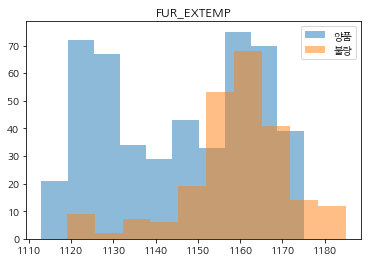

In [30]:
fun_plot_hist(df_raw, "FUR_EXTEMP")

### 압연 온도

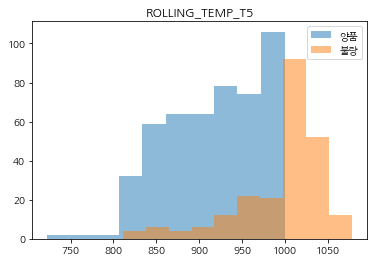

In [31]:
fun_plot_hist(df_raw, "ROLLING_TEMP_T5")

- 압연 온도에서 이상치가 발생하는 것으로 보여 해당 이상치에 대해 사전 처리를 진행해야겠다.
- 진행한 후 데이터에 이상치가 없어보임을 확인함.

#### WORK_GR

In [32]:
fun_print_crosstab(df_raw, "WORK_GR")

WORK_GR,1조,2조,3조,4조,All
SCALE,,,,,
불량,67,45,54,65,231
양품,121,119,115,128,483
All,188,164,169,193,714


- 조별로 양품과 불량률에 차이가 크게 없어 보이기에 이번 분석에서는 사용하지 않도록 하겠다.

#### FUR_NO_ROW: 가열로 작업 순번

In [33]:
fun_print_crosstab(df_raw, "FUR_NO_ROW")

FUR_NO_ROW,1,2,All
SCALE,,,
불량,120,111,231
양품,239,244,483
All,359,355,714


- 가열로 작업 순번도 비율이 동등하게 나오기에 SCALE불량과 연관이 없다고 판단된다. 따라서  유의미한 결과가 나오지 않을 것으로 판단되어 분석에서 제외한다.

#### HSB(HSB적용 유무 1-적용, 2-미적용)

In [34]:
fun_print_crosstab(df_raw, "HSB")

HSB,미적용,적용,All
SCALE,,,
불량,33,198,231
양품,0,483,483
All,33,681,714


- HSB적용 유무와 관련해서 미적용시 모두 불량임을 확인할 수 있었다.
- HSB 적용여부는 SCALE불량과 연관이 있다고 가정한 상태에서 HSB를 적용했음에도 불량이 나오는 데이터에 대해서만 모델링을 진행해볼 계획이다.

#### STEEL_KIND

In [35]:
fun_print_crosstab(df_raw, "STEEL_KIND")

STEEL_KIND,C,T,All
SCALE,,,
불량,214,17,231
양품,295,188,483
All,509,205,714


- STEEL_KIND로 나눴을 때 T종보다 C종에서 상당히 높은 불량율을 보여주는 것을 확인했다.
- 이에 따라 STEEL_KIND별로 나눠서 분석을 진행해볼 때, C강종만 따로 나눠서 분석을 진행해볼 계획이다.

### SPEC
- 67가지의 Column으로 보류

In [36]:
fun_print_crosstab(df_raw, "SPEC")

SPEC,A131-DH36TM,A283-C,A516-60,A709-36,AB/A,AB/AH32,AB/B,AB/EH32-TM,AB/EH36-TM,API-2W-50T,...,NV-A36-TM,NV-B,NV-D32-TM,NV-D36-TM,NV-E32-TM,NV-E36-TM,PILAC-BT33,SA283-C,V42JBN3,All
SCALE,,,,,,,,,,,,,,,,,,,,,
불량,1,5,1,0,4,1,3,0,1,0,...,0,2,0,1,0,0,2,10,1,231
양품,0,1,1,1,3,4,3,2,16,2,...,2,1,3,4,2,5,36,11,3,483
All,1,6,2,1,7,5,6,2,17,2,...,2,3,3,5,2,5,38,21,4,714


- SPEC의 경우 분석이 쉽지 않아 보이고, SPEC별로 불량률을 계산해도 데이터가 한계가 있어보이기에, SPEC 변수는 분석에서 제외하도록 하겠다.

## 탐색적 기법 정리
- 목표변수: SCALE
- 설명변수: STEEL_KIND, PT_THICK, PT_WIDTH, PT_LENGTH, PT_WEIGHT, FUR_HZ_TEMP, FUR_HZ_TIME, FUR_SZ_TEMP, FUR_SZ_TIME, FUR_TIME, FUR_EXTEMP, ROLLING_TEMP_T5, HSB, ROLLING_DESCALING


- 목표변수 1개, 설명변수 13개를 이용하도록 하겠다.

In [37]:
df_raw_final = df_raw.drop(["SPEC", "FUR_NO", "FUR_NO_ROW", "WORK_GR"], axis=1)

In [38]:
df_raw_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 719
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              714 non-null    object 
 1   STEEL_KIND         714 non-null    object 
 2   PT_THK             714 non-null    float64
 3   PT_WDTH            714 non-null    int64  
 4   PT_LTH             714 non-null    int64  
 5   PT_WGT             714 non-null    int64  
 6   FUR_HZ_TEMP        714 non-null    int64  
 7   FUR_HZ_TIME        714 non-null    int64  
 8   FUR_SZ_TEMP        714 non-null    int64  
 9   FUR_SZ_TIME        714 non-null    int64  
 10  FUR_TIME           714 non-null    int64  
 11  FUR_EXTEMP         714 non-null    int64  
 12  ROLLING_TEMP_T5    714 non-null    int64  
 13  HSB                714 non-null    object 
 14  ROLLING_DESCALING  714 non-null    int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 89.2+ KB


### 최종 분석 대상 데이터 도출
- HSB데이터를 미적용한 데이터의 경우 모두 불량으로 나왔기에 HSB를 핵심인자로 선정한 후, HSB를 적용한 데이터로만 분석을 진행하도록 하겠다.

In [39]:
df_raw[df_raw_final["HSB"]=="미적용"].index

Int64Index([ 71,  79,  85, 112, 163, 246, 250, 290, 303, 327, 330, 341, 361,
            363, 379, 388, 393, 403, 438, 446, 468, 492, 505, 514, 535, 551,
            565, 591, 592, 608, 621, 683, 700],
           dtype='int64')

In [40]:
df_raw_final = df_raw_final.drop(df_raw[df_raw_final["HSB"]=="미적용"].index, inplace=False)

In [41]:
df_raw_final.drop("HSB", axis=1, inplace = True)

In [42]:
df_raw_final.columns

Index(['SCALE', 'STEEL_KIND', 'PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT',
       'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME',
       'FUR_EXTEMP', 'ROLLING_TEMP_T5', 'ROLLING_DESCALING'],
      dtype='object')

- 목표변수: 1, 설명변수: 12

### 목표변수 형변환

In [43]:
df_raw_final["SCALE"] = np.where(df_raw_final["SCALE"] == "불량", 1, 0)

In [44]:
df_raw_final.head()

,SCALE,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,0,T,32.25,3707,15109,14180,1144,116,1133,59,282,1133,934,8
1,0,T,32.25,3707,15109,14180,1144,122,1135,53,283,1135,937,8
2,0,T,33.27,3619,19181,18130,1129,116,1121,55,282,1121,889,8
3,0,T,33.27,3619,19181,18130,1152,125,1127,68,316,1127,885,8
4,0,T,38.33,3098,13334,12430,1140,134,1128,48,314,1128,873,8


In [45]:
(df_raw_final["SCALE"] == 0).sum()

483

## 2. 모델링 기법

※ 변수 중요도에 집중하면서 모델링 기법을 활용해 볼 계획이다.  
※ 모델링을 진행하면서 STEEL_KIND를 통해 별도로 데이터를 뽑아 진행해볼 계획이다.

# 1. 로지스틱 회귀분석

### 데이터 분할

In [46]:
df_train, df_test = train_test_split(df_raw_final,
                                     test_size =0.3, random_state=1234)

print("train data size: {}".format(df_train.shape))
print("Test data size: {}".format(df_test.shape))

train data size: (476, 14)
Test data size: (205, 14)


In [47]:
df_train["SCALE"]

707    0
513    0
179    1
436    0
491    0
      ..
703    0
391    1
212    1
54     0
306    0
Name: SCALE, Length: 476, dtype: int64

In [48]:
df_train.head()

,SCALE,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
707,0,C,12.05,3088,50530,14760,1183,66,1166,68,257,1166,896,10
513,0,T,75.74,1840,16672,36480,1124,77,1127,143,342,1127,811,6
179,1,C,19.12,2102,43709,41370,1147,56,1161,73,324,1161,1017,10
436,0,T,40.35,2751,23376,61110,1156,77,1128,126,304,1128,816,6
491,0,T,75.33,1840,10514,11440,1140,139,1123,72,390,1123,876,6


In [56]:
log_model = Logit.from_formula("""SCALE ~ + PT_THK 
+ PT_WDTH + PT_LTH + C(STEEL_KIND) + PT_WGT + PT_WGT
+ FUR_HZ_TIME + FUR_SZ_TEMP + FUR_TIME  
+ ROLLING_TEMP_T5 + ROLLING_DESCALING""", df_train)
log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.282572
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  476
Model:                          Logit   Df Residuals:                      465
Method:                           MLE   Df Model:                           10
Date:                Mon, 08 Mar 2021   Pseudo R-squ.:                  0.5181
Time:                        20:21:27   Log-Likelihood:                -134.50
converged:                       True   LL-Null:                       -279.09
Covariance Type:            nonrobust   LLR p-value:                 3.012e-56
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -128.1562     24.873     -5.152      0.000    -176.907     -79.406
C(STE

- FUR_SZ_TIME인 균열대 시간의 경우 p-value가 너무 좋지 않아 해당 변수를 제거하도록 하겠다.

In [49]:
df_raw_final.drop("FUR_SZ_TEMP", axis=1, inplace = True)

#### FUR_EXTEMP칼럼 제거
- 탐색적 분석 및 로지스틱 회귀분석에 의거

In [50]:
df_raw_final.drop("FUR_EXTEMP", axis=1, inplace = True)

- 초기 로지스틱 회귀가 되지 않아 어떤 문제가 있는지 확인하는 과정에서 "FUR_EXTEMP" 열이 에러가 생기는 경우를 발견했다.
- 그 이유를 확인한 결과 FUR_EXTEMP를 제거하고 그래프를 그릴 수 있었다. 해당 변수는 FUR_SZ_TEMP와 같은 분포를 그리는 것을 확인할 수 있었다.
- 따라서 해당 추출온도 칼럼을 제거하도록 하겠다.

- p-balue를 보니 안 좋게 나오는 칼럼들이 존재해서 데이터 스케일링을 통해 주요변수를 도출해보도록 하겠다.

In [52]:
df_raw_final.columns

Index(['SCALE', 'STEEL_KIND', 'PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT',
       'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TIME', 'FUR_TIME',
       'ROLLING_TEMP_T5', 'ROLLING_DESCALING'],
      dtype='object')

### 새로운 모델로 예측값 확인

In [57]:
y_pred = log_result.predict(df_test)

In [58]:
y_pred_class = (y_pred > 0.5).astype(int)

In [59]:
y_pred_class.count()

205

In [60]:
df_test["SCALE"].shape

(205,)

In [61]:
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_test["SCALE"], y_pred_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["SCALE"], y_pred_class)))

Accuracy:0.868

Confusion Matrix: 
[[126  11]
 [ 16  52]]


- 예측도를 확인하기 위해서 연속형 데이터를 이산형 데이터로 만들어 목표변수와 비교할 수 있어야 한다. 
- 정확도는 86.8프로 나왔다. Confusion Matrix는 엄청 좋게 나오지는 않았지만 개선방안을 도출하기에는 로지스틱 회귀모형이 선형관계를 나타낼 수 있기에 괜찮다고 생각한다.

### 데이터 스케일링

In [62]:
df_char = df_raw_final.select_dtypes(include="object")
df_numeric = df_raw_final.select_dtypes(exclude="object")

# Data Scailing
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns=df_numeric.columns)

# 문자데이터 + 숫자데이터
df_scaled = pd.concat([df_numeric_scaled, df_char], axis=1)
df_scaled.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,ROLLING_DESCALING,STEEL_KIND
0,-0.640264,0.172128,1.750079,-1.400609,-1.103183,-0.543827,0.728494,-0.542057,-0.403553,-0.125779,-0.19688,T
1,-0.640264,0.172128,1.750079,-1.400609,-1.103183,-0.543827,0.888227,-0.705962,-0.381367,-0.080379,-0.19688,T
2,-0.640264,0.226581,1.579297,-1.104231,-0.944443,-1.265656,0.728494,-0.651327,-0.403553,-0.806785,-0.19688,T
3,-0.640264,0.226581,1.579297,-1.104231,-0.944443,-0.158852,0.968093,-0.296200,0.350775,-0.867319,-0.19688,T
4,-0.640264,0.496711,0.568192,-1.529801,-1.173511,-0.736315,1.207693,-0.842549,0.306403,-1.048921,-0.19688,T


In [63]:
df_scaled["SCALE"] = df_raw_final["SCALE"]
df_scaled.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,ROLLING_DESCALING,STEEL_KIND
0,0.0,0.172128,1.750079,-1.400609,-1.103183,-0.543827,0.728494,-0.542057,-0.403553,-0.125779,-0.19688,T
1,0.0,0.172128,1.750079,-1.400609,-1.103183,-0.543827,0.888227,-0.705962,-0.381367,-0.080379,-0.19688,T
2,0.0,0.226581,1.579297,-1.104231,-0.944443,-1.265656,0.728494,-0.651327,-0.403553,-0.806785,-0.19688,T
3,0.0,0.226581,1.579297,-1.104231,-0.944443,-0.158852,0.968093,-0.296200,0.350775,-0.867319,-0.19688,T
4,0.0,0.496711,0.568192,-1.529801,-1.173511,-0.736315,1.207693,-0.842549,0.306403,-1.048921,-0.19688,T


In [64]:
# 데이터 분할
df_scaled_train, df_scaled_test = train_test_split(df_scaled,
                                     test_size =0.3, random_state=1234)
print("train data size: {}".format(df_scaled_train.shape))
print("Test data size: {}".format(df_scaled_test.shape))

train data size: (502, 12)
Test data size: (216, 12)


In [66]:
scaled_log_model = Logit.from_formula("""SCALE ~ + PT_THK 
    + PT_WDTH + PT_LTH + PT_WGT + FUR_HZ_TEMP 
    + FUR_HZ_TIME + FUR_TIME 
    + ROLLING_TEMP_T5 + ROLLING_DESCALING + C(STEEL_KIND)""", df_scaled_train)
scaled_log_result = scaled_log_model.fit()
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.424572
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  447
Model:                          Logit   Df Residuals:                      436
Method:                           MLE   Df Model:                           10
Date:                Mon, 08 Mar 2021   Pseudo R-squ.:                  0.3189
Time:                        20:22:57   Log-Likelihood:                -189.78
converged:                       True   LL-Null:                       -278.65
Covariance Type:            nonrobust   LLR p-value:                 6.913e-33
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.8880      0.285     -3.116      0.002      -1.446      -0.329
C(STE

### 변수 중요도

<AxesSubplot:>

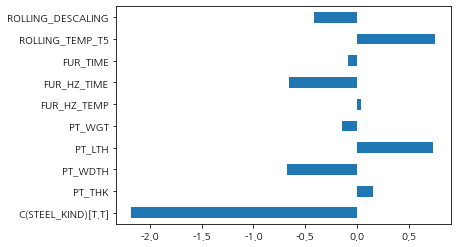

In [67]:
df_log_scaled_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]},
                                  index=scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y="Coef", legend= False)

- 강종이 C인 경우 T보다 양품인 경우가 많이 나타나는 것으로 보인다. 해당 정보는 탐색적 분석에서 C의 자료가 T의 자료보다 많기 때문에 나오는 결과라고 생각을 한다. 불량과 양의 상관관계가 있는 인자로는 PT_LTH, ROLLING_TEMP_T5, FUR_SZ_TEMP 순이었고, 강종을 제외한 PT_THK, FUR_HZ_TIME, ROLLLING_DESCAILING 순으로 음의 상관관계가 나타났다.

- 온도와 관련된 인자로는 압연온도, 가열로 균열대 온도, 가열로 가열대 온도 등이 나왔다.
- 플레이트와 관련된 인자로는 PT_LTH와 PT_THK가 나왔다. 압연 중 DESCAILNG 횟수의 경우 횟수가 늘어나면 불량률은 줄어드는 것으로 보인다.

# 2. 의사결정나무

### 더미변수 생성

In [74]:
df_raw_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681 entries, 0 to 719
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              681 non-null    int64  
 1   STEEL_KIND         681 non-null    object 
 2   PT_THK             681 non-null    float64
 3   PT_WDTH            681 non-null    int64  
 4   PT_LTH             681 non-null    int64  
 5   PT_WGT             681 non-null    int64  
 6   FUR_HZ_TEMP        681 non-null    int64  
 7   FUR_HZ_TIME        681 non-null    int64  
 8   FUR_SZ_TIME        681 non-null    int64  
 9   FUR_TIME           681 non-null    int64  
 10  ROLLING_TEMP_T5    681 non-null    int64  
 11  ROLLING_DESCALING  681 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 89.2+ KB


In [75]:
# 설명변수, 목표변수 분리(split_추후 활용)
df_raw_y = df_raw_final["SCALE"]
df_raw_x = df_raw_final.drop(["SCALE"], axis=1, inplace=False)
df_raw_x.shape

(681, 11)

In [76]:
df_raw_x_dummy = pd.get_dummies(df_raw_x)
df_raw_x_dummy.head()
df_raw_x_dummy.shape

(681, 12)

In [77]:
# train_test_split (7:3으로 트레인과 테스트 데이터가 나눠진다.)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x_dummy, df_raw_y, 
                                                                test_size=0.3, random_state=1234)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (476, 12)
train data Y size: (476,)
test data X size: (205, 12)
test data Y size: (205,)


In [82]:
tree_graph = DecisionTreeClassifier(random_state=1234)
tree_graph.fit(df_train_x, df_train_y)

# Train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_graph.score(df_train_x, df_train_y)))
#test데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_graph.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [84]:
tree_pred = tree_graph.predict(df_test_x)

print("Accuracy:{0:.3f}\n".format(tree_graph.score(df_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, tree_pred)))

Accuracy:0.937

Confusion Matrix: 
[[128   9]
 [  4  64]]


- 정확도 96프로

In [88]:
df_importance = pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"] = tree_graph.feature_importances_
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
8,ROLLING_TEMP_T5,0.852
4,FUR_HZ_TEMP,0.081
9,ROLLING_DESCALING,0.023
0,PT_THK,0.018
7,FUR_TIME,0.015
3,PT_WGT,0.012
1,PT_WDTH,0.000
2,PT_LTH,0.000
5,FUR_HZ_TIME,0.000
6,FUR_SZ_TIME,0.000


Text(0, 0.5, '변수')

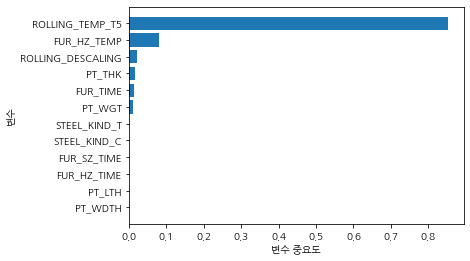

In [89]:
df_importance.sort_values("Importance", ascending= True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

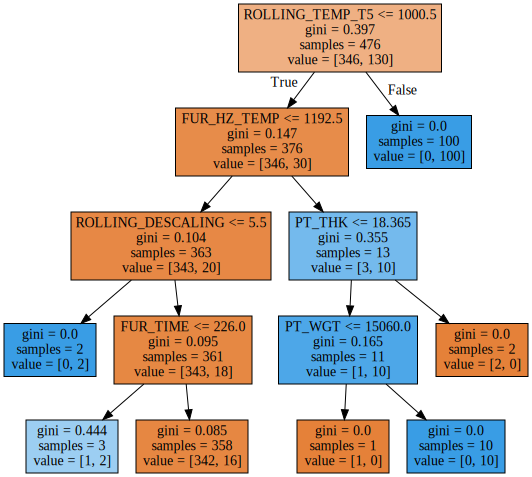

In [91]:
v_feature_name = df_train_x.columns

# 분리노드의 최소 자료수 설정
tree_graph = DecisionTreeClassifier(max_depth=4, random_state=1234)
tree_graph.fit(df_train_x, df_train_y)

## Tree 구조 생성 및 저장: 모델 시각화
export_graphviz(tree_graph, out_file = "tree_leaf.dot", feature_names = v_feature_name,
                impurity=True, filled = True) # filled 색으로 영향력 표시

with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

- ROLLING_TEMP_T5(압연온도), FUR_SZ_TEMP(가열로 균열대 온도), ROLLINT_DESCAILING, FUR_TIME 순으로 중요도가 나왔다.

- ROLLING_TEMP_T5가 1000.5보다 클 경우 모두 불량으로 나왔다.
- ROLLING_TEMP_T5가 1000.5보다 작은 경우  FUR_HZ_TEMP로 새로 분류를 진행한다.

- FUR_HZ_TEMP가 1192.5이하일 때는 ROLLIN_DESCALING으로, 이상일 때는 PT_THK로 데이터를 분류한다.

- 다음으로 ROLLING_DESCAILING이 5.5이상과 이하로 데이터를 추가 분류한다.


# 3. 랜덤포레스트

In [92]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

rf_pred = rf_uncustomized.predict(df_test_x)

# Train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))

#test데이터 정확도
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))
# confusion Matrix
print("Comfusion Matrix: \n{}".format(confusion_matrix(df_test_y, rf_pred)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937
Comfusion Matrix: 
[[136   1]
 [ 12  56]]


### 중요도

In [93]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"] = rf_uncustomized.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
8,ROLLING_TEMP_T5,0.459
9,ROLLING_DESCALING,0.093
1,PT_WDTH,0.071
0,PT_THK,0.070
4,FUR_HZ_TEMP,0.064
2,PT_LTH,0.047
11,STEEL_KIND_T,0.046
3,PT_WGT,0.034
7,FUR_TIME,0.033
6,FUR_SZ_TIME,0.029


Text(0, 0.5, '변수')

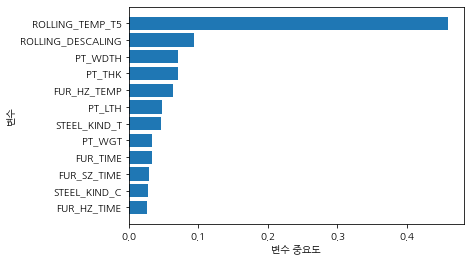

In [94]:
df_importance.sort_values("Importance", ascending= True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 4. 그레디언트 부스팅

In [95]:
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

gb_pred = rf_uncustomized.predict(df_test_x)

# Train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))

#test데이터 정확
print("Accuracy on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

# confusion Matrix
print("Comfusion Matrix: \n{}".format(confusion_matrix(df_test_y, gb_pred)))

Accuracy on training set: 1.000
Accuracy on test set: 0.985
Comfusion Matrix: 
[[136   1]
 [ 12  56]]


- 테스트 데이터 99.5프로

### 중요도

In [97]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"] = gb_uncustomized.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
8,ROLLING_TEMP_T5,0.735
4,FUR_HZ_TEMP,0.082
0,PT_THK,0.061
9,ROLLING_DESCALING,0.053
1,PT_WDTH,0.019
7,FUR_TIME,0.019
3,PT_WGT,0.013
6,FUR_SZ_TIME,0.008
2,PT_LTH,0.007
5,FUR_HZ_TIME,0.003


Text(0, 0.5, '변수')

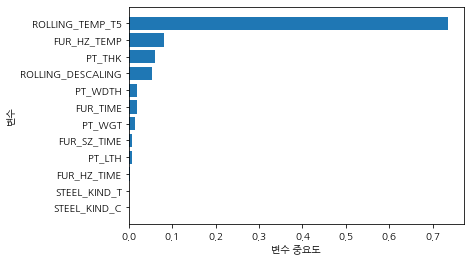

In [98]:
df_importance.sort_values("Importance", ascending= True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

## 5. 정확도 및 Confusion Matrix

In [99]:
# 로지스틱 회귀분석
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_test["SCALE"], y_pred_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["SCALE"], y_pred_class)))

Accuracy:0.868

Confusion Matrix: 
[[126  11]
 [ 16  52]]


In [100]:
# 의사결정나무
print("Accuracy:{0:.3f}\n".format(tree_graph.score(df_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, tree_pred)))

Accuracy:0.956

Confusion Matrix: 
[[128   9]
 [  4  64]]


In [101]:
# 랜덤포레스트

print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))
print("Comfusion Matrix: \n{}".format(confusion_matrix(df_test_y, rf_pred)))

Accuracy on test set: 0.937
Comfusion Matrix: 
[[136   1]
 [ 12  56]]


In [102]:
# 그레디언트 부스팅
print("Accuracy on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))
print("Comfusion Matrix: \n{}".format(confusion_matrix(df_test_y, gb_pred)))

Accuracy on test set: 0.985
Comfusion Matrix: 
[[136   1]
 [ 12  56]]


- 정확도를 비교해보면 그레디언트 부스팅의 성능이 가장 좋아 보이지만 Confusion Matrix의 결과는 유사하며, Tree를 통해 개선방안을 도출하기 용이하므로  최종 결론을 정리함에 있어서는 의사결정 나무를 활용하겠다.

In [ ]:
-